In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the IMDb Top 1000 data
file_path = 'C:/Users/vikas/Downloads/IMDB-Movies-PowerBi-Dashboard-main/IMDB-Movies-PowerBi-Dashboard-main/Data/imdb_top_1000.csv'
df = pd.read_csv(file_path)


In [2]:
print(df.head())


                                         Poster_Link  \
0  https://m.media-amazon.com/images/M/MV5BMDFkYT...   
1  https://m.media-amazon.com/images/M/MV5BM2MyNj...   
2  https://m.media-amazon.com/images/M/MV5BMTMxNT...   
3  https://m.media-amazon.com/images/M/MV5BMWMwMG...   
4  https://m.media-amazon.com/images/M/MV5BMWU4N2...   

               Series_Title Released_Year Certificate  Runtime  \
0  The Shawshank Redemption          1994           A  142 min   
1             The Godfather          1972           A  175 min   
2           The Dark Knight          2008          UA  152 min   
3    The Godfather: Part II          1974           A  202 min   
4              12 Angry Men          1957           U   96 min   

                  Genre  IMDB_Rating  \
0                 Drama          9.3   
1          Crime, Drama          9.2   
2  Action, Crime, Drama          9.0   
3          Crime, Drama          9.0   
4          Crime, Drama          9.0   

                         

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Poster_Link    1000 non-null   object 
 1   Series_Title   1000 non-null   object 
 2   Released_Year  1000 non-null   object 
 3   Certificate    899 non-null    object 
 4   Runtime        1000 non-null   object 
 5   Genre          1000 non-null   object 
 6   IMDB_Rating    1000 non-null   float64
 7   Overview       1000 non-null   object 
 8   Meta_score     843 non-null    float64
 9   Director       1000 non-null   object 
 10  Star1          1000 non-null   object 
 11  Star2          1000 non-null   object 
 12  Star3          1000 non-null   object 
 13  Star4          1000 non-null   object 
 14  No_of_Votes    1000 non-null   int64  
 15  Gross          831 non-null    object 
dtypes: float64(2), int64(1), object(13)
memory usage: 125.1+ KB
None


In [4]:
print(df.isnull().sum())

Poster_Link        0
Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64


In [5]:
print(df.describe())

       IMDB_Rating  Meta_score   No_of_Votes
count  1000.000000  843.000000  1.000000e+03
mean      7.949300   77.971530  2.736929e+05
std       0.275491   12.376099  3.273727e+05
min       7.600000   28.000000  2.508800e+04
25%       7.700000   70.000000  5.552625e+04
50%       7.900000   79.000000  1.385485e+05
75%       8.100000   87.000000  3.741612e+05
max       9.300000  100.000000  2.343110e+06


In [6]:
print(df.duplicated().sum())

0


In [7]:
print(df.columns)

Index(['Poster_Link', 'Series_Title', 'Released_Year', 'Certificate',
       'Runtime', 'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director',
       'Star1', 'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
      dtype='object')


In [8]:
print(df.dtypes)

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object


In [9]:
print(df.shape)

(1000, 16)


In [10]:
df_clean = df.drop(['Poster_Link'], axis=1)

In [11]:
df_clean['Gross'] = pd.to_numeric(df_clean['Gross'].str.replace(',', ''), errors='coerce')

In [12]:
df_clean = df_clean.dropna(subset=['Certificate', 'Meta_score', 'Gross'])

In [13]:
df_clean = df_clean.dropna()

In [14]:
print(df_clean.isnull().sum())

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64


In [15]:
print(df_clean.shape)

(714, 15)


In [16]:
genre_counts = df_clean['Genre'].value_counts()
print(genre_counts)

Drama                         58
Drama, Romance                26
Comedy, Drama                 24
Crime, Drama, Thriller        22
Action, Adventure, Sci-Fi     21
                              ..
Crime, Film-Noir, Thriller     1
Drama, Film-Noir, Romance      1
Drama, History, Romance        1
Adventure, Horror, Sci-Fi      1
Comedy, Music, Musical         1
Name: Genre, Length: 172, dtype: int64


In [17]:
numeric_statistics = df_clean.describe()
print(numeric_statistics)

       IMDB_Rating  Meta_score   No_of_Votes         Gross
count   714.000000  714.000000  7.140000e+02  7.140000e+02
mean      7.937115   77.158263  3.561348e+05  7.851359e+07
std       0.293278   12.401144  3.539011e+05  1.149780e+08
min       7.600000   28.000000  2.522900e+04  1.305000e+03
25%       7.700000   70.000000  9.600975e+04  6.157408e+06
50%       7.900000   78.000000  2.366025e+05  3.485015e+07
75%       8.100000   86.000000  5.077922e+05  1.024641e+08
max       9.300000  100.000000  2.343110e+06  9.366622e+08


In [18]:
movies_per_year = df_clean['Released_Year'].value_counts().sort_index()
print(movies_per_year)

1930     1
1931     1
1933     1
1934     1
1936     1
        ..
2016    20
2017    18
2018    12
2019    15
PG       1
Name: Released_Year, Length: 83, dtype: int64


In [19]:
avg_rating_per_genre = df_clean.groupby('Genre')['IMDB_Rating'].mean()
print(avg_rating_per_genre)

Genre
Action, Adventure             8.180000
Action, Adventure, Comedy     7.828571
Action, Adventure, Drama      8.225000
Action, Adventure, Family     7.600000
Action, Adventure, Fantasy    8.200000
                                ...   
Horror, Thriller              7.700000
Mystery, Romance, Thriller    8.300000
Mystery, Sci-Fi, Thriller     7.800000
Mystery, Thriller             8.150000
Western                       8.350000
Name: IMDB_Rating, Length: 172, dtype: float64


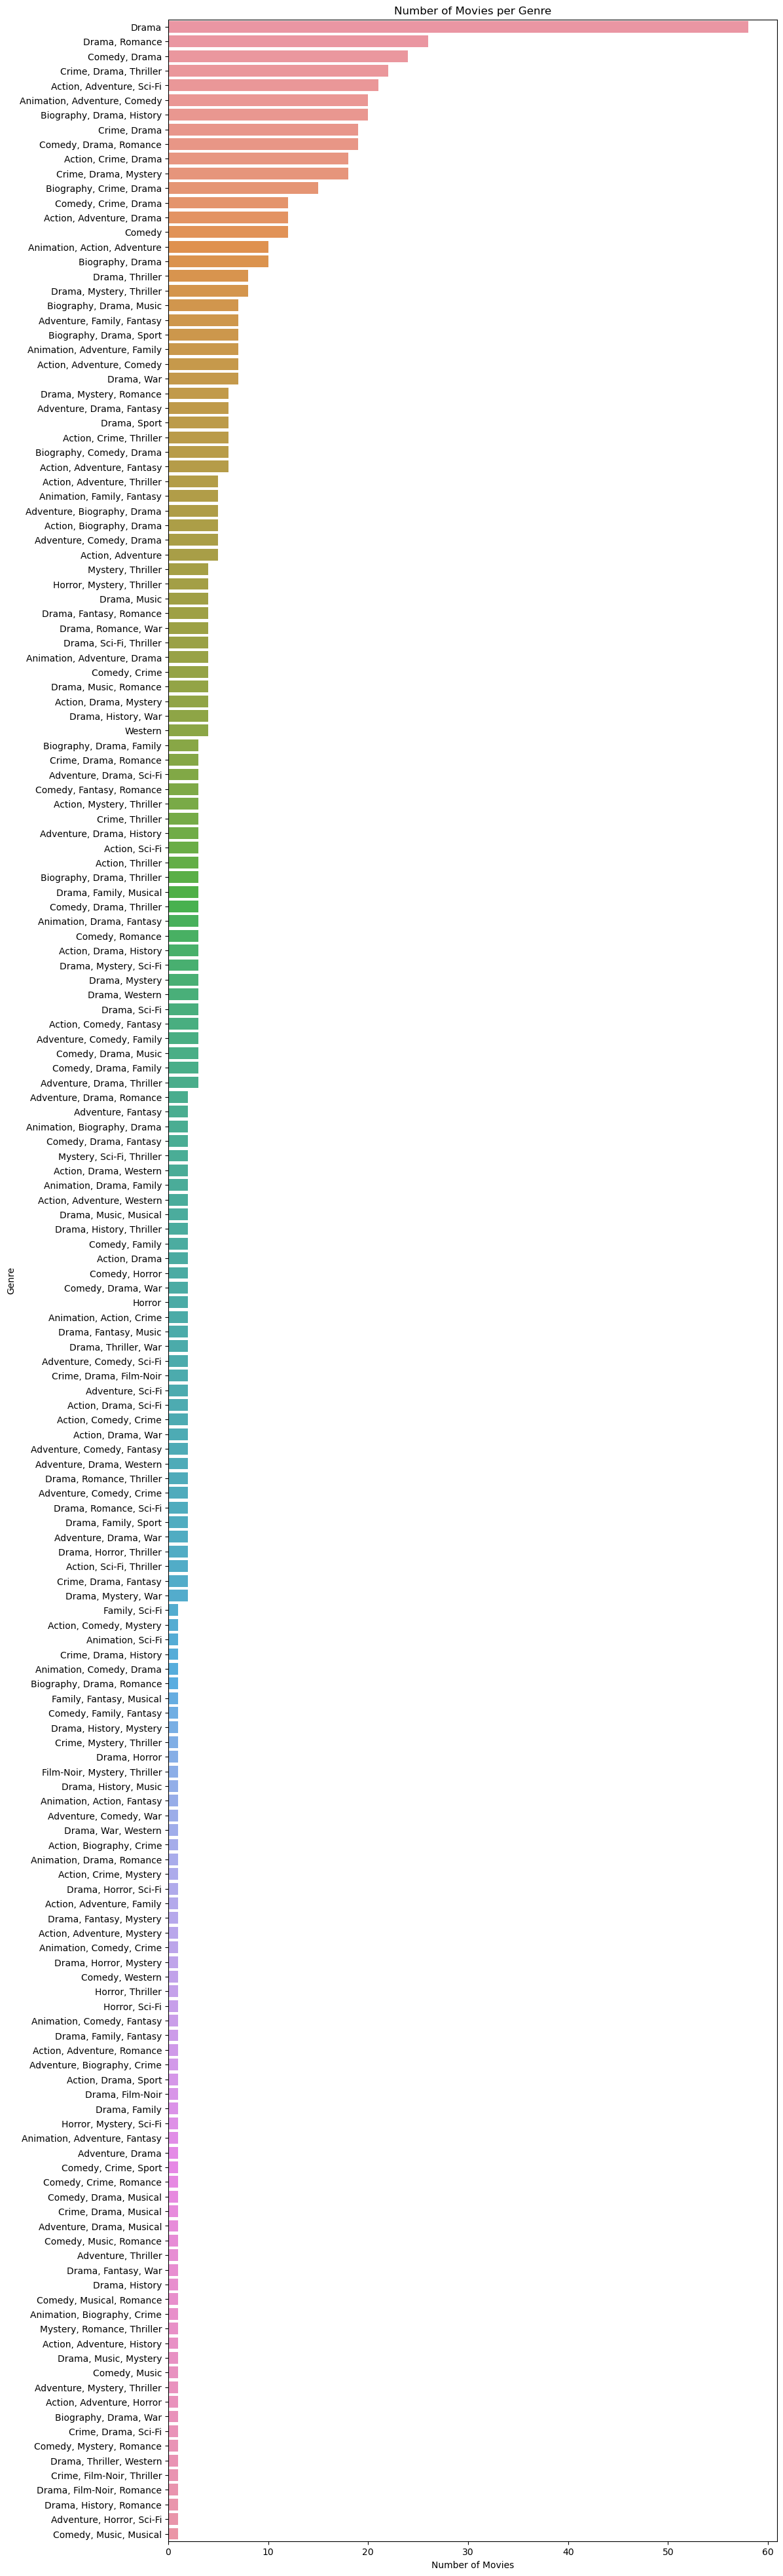

In [26]:
plt.figure(figsize=(12, 50))
sns.countplot(y=df_clean['Genre'], order=genre_counts.index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()


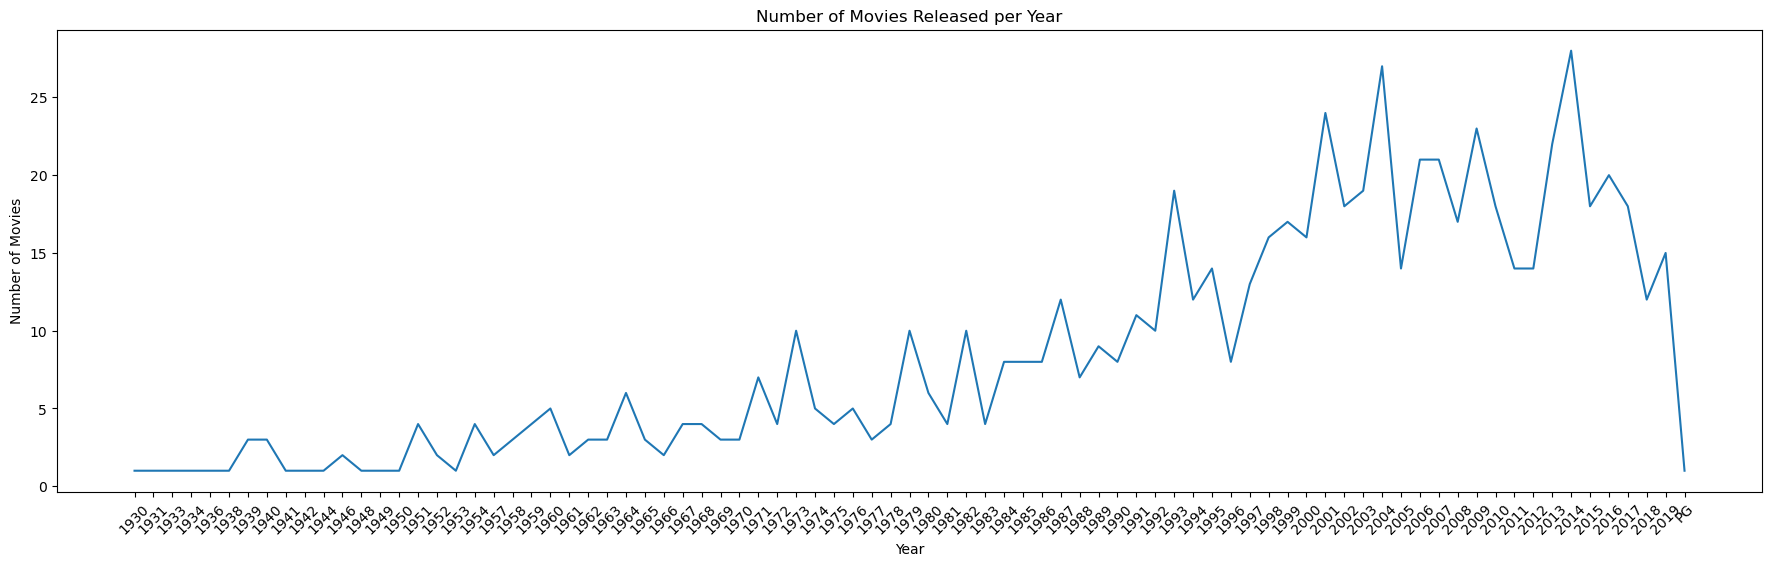

In [25]:
plt.figure(figsize=(22, 6))
sns.lineplot(x=movies_per_year.index, y=movies_per_year.values)
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

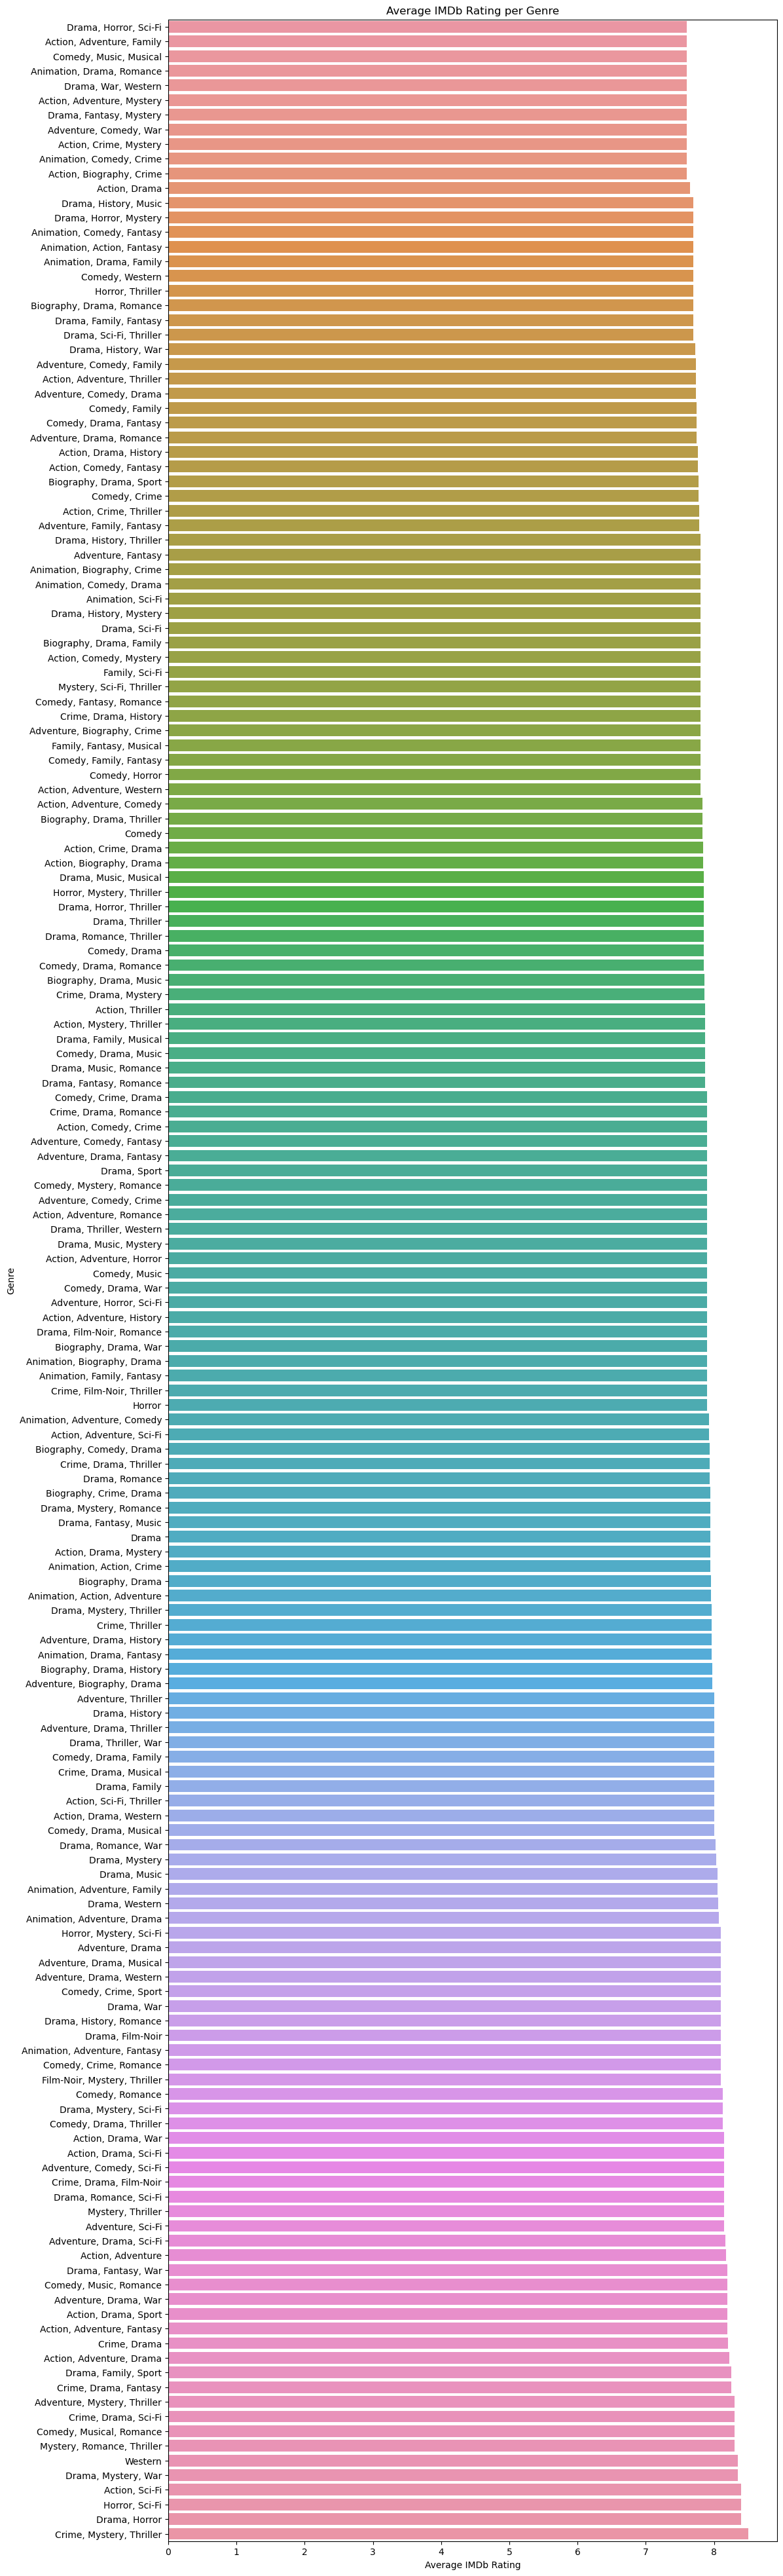

In [28]:
plt.figure(figsize=(12,50))
avg_rating_per_genre_sorted = avg_rating_per_genre.sort_values()
sns.barplot(x=avg_rating_per_genre_sorted.values, y=avg_rating_per_genre_sorted.index)
plt.title('Average IMDb Rating per Genre')
plt.xlabel('Average IMDb Rating')
plt.ylabel('Genre')
plt.show()


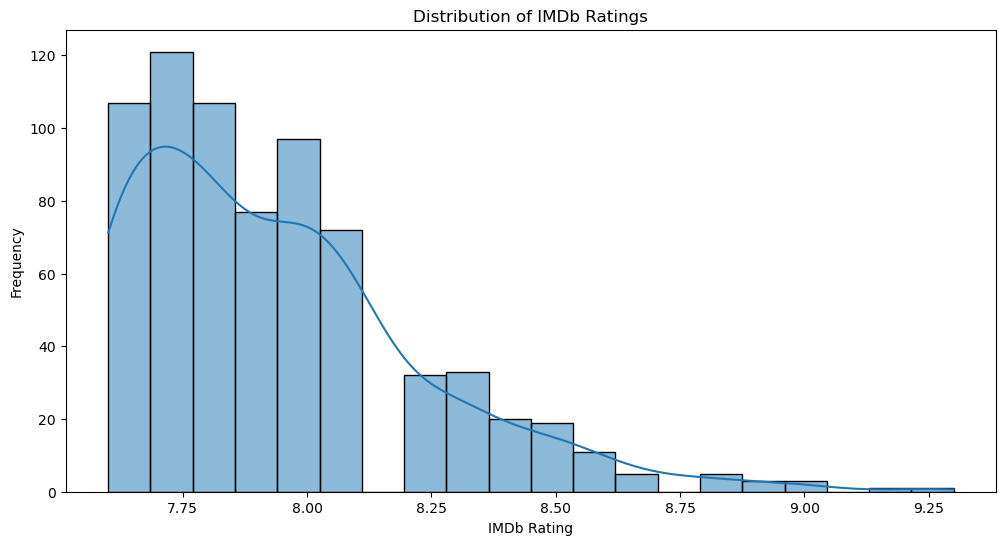

In [29]:
plt.figure(figsize=(12, 6))
sns.histplot(df_clean['IMDB_Rating'], bins=20, kde=True)
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')
plt.show()

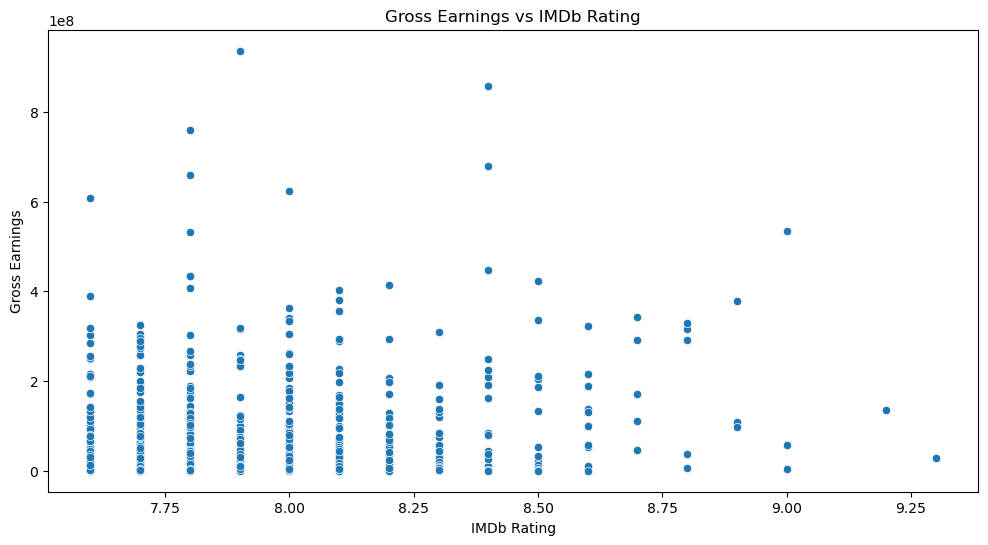

In [30]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='IMDB_Rating', y='Gross', data=df_clean)
plt.title('Gross Earnings vs IMDb Rating')
plt.xlabel('IMDb Rating')
plt.ylabel('Gross Earnings')
plt.show()
